In [1]:
from wordcloud import WordCloud

In [2]:
import nltk
from nltk.corpus.reader.plaintext import *
#from nltk.corpus import stopwords
import collections
from nltk.util import ngrams

from collections import Counter

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

import os

In [4]:
corpus = PlaintextCorpusReader('Z:\\Documents\\Son Reader\\Corpus', '.*\.txt')

#### create a word cloud for the entire corpus

In [5]:
words = []

for text in corpus.fileids():
    tokens = word_tokenize(corpus.raw(text).lower())
    for token in tokens:
        words.append(token)
        
words = pd.Series(words).str.cat(sep=' ')    

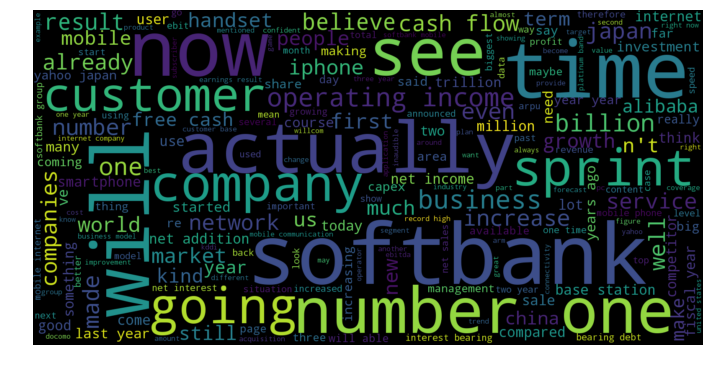

In [10]:
wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(words)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### lets get rid of stop words

In [11]:
from wordcloud import STOPWORDS 

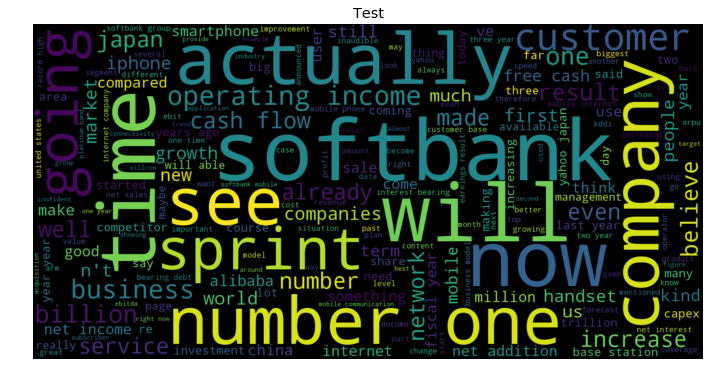

In [12]:
wordcloud = WordCloud(width=1600,height=800,max_font_size=200,stopwords=STOPWORDS).generate(words)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Test", size="x-large", stretch="expanded")
plt.show()

In [13]:
def cloudMaker (corpus, folder, width=1600,height=800,max_font_size=200, 
                stopwords=STOPWORDS, collocations = False, figsize=(12,10)):
    
    for text in corpus.fileids():
        words = []
        tokens = word_tokenize(corpus.raw(text).lower())
        for token in tokens:
            words.append(token)

        words = pd.Series(words).str.cat(sep=' ')
        
        wordcloud = WordCloud(width=width, 
                              height=height, 
                              max_font_size=max_font_size,
                              stopwords=stopwords).generate(words)
        plt.figure(figsize=figsize)
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.title(text[:7])
        plt.savefig('Z:\\Documents\\Son Reader\\WordCloud\\' + folder + '\\' + text[:7] + '.png')
        plt.close()

In [14]:
cloudMaker (corpus, "Clouds_With_StopWords", stopwords=None)

KeyboardInterrupt: 

In [17]:
cloudMaker (corpus, "Clouds_Without_StopWords")

In [ ]:
import sys
import datetime
import imageio

VALID_EXTENSIONS = ('png', 'jpg')


def create_gif(filenames, duration):
    images = []
    for filename in filenames:
        images.append(imageio.imread(filename))
    output_file = 'Gif-%s.gif' % datetime.datetime.now().strftime('%Y-%M-%d-%H-%M-%S')
    imageio.mimsave(output_file, images, duration=duration)

In [15]:
import imageio

png_dir = "Z:\\Documents\\Son Reader\\WordCloud\\Clouds_With_StopWords\\"
images = []
for subdir, dirs, files in os.walk(png_dir):
    for file in files:
        file_path = os.path.join(subdir, file)
        if file_path.endswith(".png"):
            images.append(imageio.imread(file_path))
imageio.mimsave('Z:\\Documents\\Son Reader\\WordCloud\\Clouds_With_StopWords\\movie.gif', images)

In [33]:
cloudMaker (corpus, "Clouds_Without_StopWords_With_Title")

In [34]:
import imageio

png_dir = "Z:\\Documents\\Son Reader\\WordCloud\\Clouds_Without_StopWords_With_Title\\"
images = []
for subdir, dirs, files in os.walk(png_dir):
    for file in files:
        file_path = os.path.join(subdir, file)
        if file_path.endswith(".png"):
            for frame in range(20):
                images.append(imageio.imread(file_path))

imageio.mimsave('Z:\\Documents\\Son Reader\\WordCloud\\Clouds_Without_StopWords_With_Title\\movie_10.gif', images)

In [26]:
from wordcloud import (WordCloud, get_single_color_func)

class SimpleGroupedColorFunc(object):
    """Create a color function object which assigns EXACT colors
       to certain words based on the color to words mapping
       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.
       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.word_to_color = {word: color
                              for (color, words) in color_to_words.items()
                              for word in words}

        self.default_color = default_color

    def __call__(self, word, **kwargs):
        return self.word_to_color.get(word, self.default_color)


class GroupedColorFunc(object):
    """Create a color function object which assigns DIFFERENT SHADES of
       specified colors to certain words based on the color to words mapping.
       Uses wordcloud.get_single_color_func
       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.
       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.color_func_to_words = [
            (get_single_color_func(color), set(words))
            for (color, words) in color_to_words.items()]

        self.default_color_func = get_single_color_func(default_color)

    def get_color_func(self, word):
        """Returns a single_color_func associated with the word"""
        try:
            color_func = next(
                color_func for (color_func, words) in self.color_func_to_words
                if word in words)
        except StopIteration:
            color_func = self.default_color_func

        return color_func

    def __call__(self, word, **kwargs):
        return self.get_color_func(word)(word, **kwargs)

color_to_words = {
    # purple
    "#9b59b6": ["sprint", "marcelo", "t-mobile", "at&t", "verizon", "deutsche telekom"],
    # blue
    "#3498db": ["artificial intelligence", "machine learning", "ai", "deep learning", 
               "machine intelligence", "super intelligence", "superintelligence", 
               "internet of things", "iot", "connected devices", "robot", "robots", 
               "robotics", "boston dynamics", "aldebaran", "schaft", "singularity"],
    # orange
     "#95a5a6": ["invest", "investment", "investments", "alibaba", "supercel", "didi", "uber", 
                "lyft", "ride sharing", "ride hailing", "grab", "grabtaxi", "ola", "oyo"],
    # green
     "#2ecc71": ["internet", "mobile internet", "smartphone", "iphone"]
    
}

default_color = 'grey'

wordcloud = WordCloud(width=1600,height=800,max_font_size=200,stopwords=STOPWORDS).generate(words)

grouped_color_func = GroupedColorFunc(color_to_words, default_color)
wordcloud.recolor(color_func=grouped_color_func)

plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

TypeError: expected string or buffer

In [18]:
keyword_cohorts = {
            "internet_and_mobile":["internet", "mobile internet", "smartphone", "iphone"],
            "sprint":["sprint", "marcelo", "t-mobile", "at&t", "verizon", "deutsche telekom"], 
            "ai":["artificial intelligence", "machine learning", "ai", "deep learning", 
                          "machine intelligence", "super intelligence", "superintelligence"],
            "iot":["internet of things", "iot", "connected devices"], 
            "robot":["robot", "robots", "robotics", "boston dynamics", "aldebaran", "schaft"],
            "ride_hailing":["uber", "didi", "lyft", "ride sharing", "ride hailing", "grab", 
                                    "grabtaxi", "ola"],
            "singularity_related":["singularity"]
                  }

In [19]:
keywords = ["internet", "mobile internet", "smartphone", "iphone", 
            "sprint", "marcelo", "t-mobile", "at&t", "verizon", "deutsche telekom", 
            "artificial intelligence", "machine learning", "ai", "deep learning", 
                          "machine intelligence", "super intelligence", "superintelligence",
            "internet of things", "iot", "connected devices",
            "robot", "robots", "robotics", "boston dynamics", "aldebaran", "schaft",
            "uber", "didi", "lyft", "ride sharing", "ride hailing", "grab", 
            "grabtaxi", "ola", "singularity", "invest", "investment", "investments", "alibaba", 
            "supercel", "gungho", "mobile game", "mobile games"]

In [20]:
trimmed_words = []

for text in corpus.fileids():
        for keyword in keywords:
            if len(word_tokenize(keyword))==3:
                sents = sent_tokenize(corpus.raw(text).lower())
                for sent in sents:
                    pairs = [ " ".join(pair) for pair in nltk.trigrams(word_tokenize(sent))]
                for item in pairs:
                    if item == keyword:
                        trimmed_words.append(item)
                    
            elif len(word_tokenize(keyword))==2:
                sents = sent_tokenize(corpus.raw(text).lower())
                for sent in sents:
                    pairs = [ " ".join(pair) for pair in nltk.bigrams(word_tokenize(sent))]
                for item in pairs:
                    if item == keyword:
                        trimmed_words.append(item)

            else:
                words = word_tokenize(corpus.raw(text).lower())
                for word in words:
                    if word == keyword:
                        trimmed_words.append(word)

In [22]:
trimmed_words = pd.Series(trimmed_words).str.cat(sep=' ')   

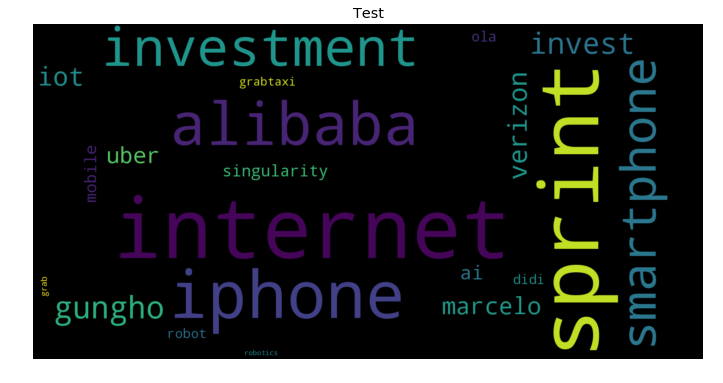

In [24]:
wordcloud = WordCloud(width=1600,height=800,max_font_size=200,stopwords=STOPWORDS, collocations = False).generate(trimmed_words)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Test", size="x-large", stretch="expanded")
plt.show()

In [25]:
color_to_words = {
    # purple
    "#9b59b6": ["sprint", "marcelo", "t-mobile", "at&t", "verizon", "deutsche telekom"],
    # blue
    "#3498db": ["artificial intelligence", "machine learning", "ai", "deep learning", 
               "machine intelligence", "super intelligence", "superintelligence", 
               "internet of things", "iot", "connected devices", "robot", "robots", 
               "robotics", "boston dynamics", "aldebaran", "schaft", "singularity"],
    # orange
     "#95a5a6": ["invest", "investment", "investments", "alibaba", "supercel", "didi", "uber", 
                "lyft", "ride sharing", "ride hailing", "grab", "grabtaxi", "ola", "oyo"],
    # green
     "#2ecc71": ["internet", "mobile internet", "smartphone", "iphone"]
    
}

default_color = 'grey'

wordcloud = WordCloud(width=1600,height=800,max_font_size=200,stopwords=STOPWORDS).generate(trimmed_words)

grouped_color_func = GroupedColorFunc(color_to_words, default_color)
wordcloud.recolor(color_func=grouped_color_func)

plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

NameError: name 'GroupedColorFunc' is not defined

### now do the same with Cvec

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

In [29]:
corpus = collections.OrderedDict()

direc = 'Z:\\Documents\\Son Reader\\Corpus'
ext = '.txt'

txt_files = [i for i in os.listdir(direc) if os.path.splitext(i)[1] == ext]

for txt in txt_files:
    with open(os.path.join(direc,txt)) as f:
        temp = ""
        for line in f:
            temp += line.replace('\n', ' ')
    corpus[txt[:7]] = temp
    
bow = {}

years =[]
#years = set([key[:4] for key in corpus.keys()])
years = [key[:4] for key in corpus.keys()]

counter = 0

for quarter in corpus:
    if quarter[:4] not in bow.keys():
        bow[quarter[:4]] = []
    if quarter[:4] == years[counter]:
        bow[quarter[:4]].append(corpus[quarter])
        counter +=1
        
cvec_by_year = {}

for year in bow:
    cvec = CountVectorizer(stop_words="english")
    count_matrix = cvec.fit_transform(bow[year])
    tf = np.sum(count_matrix, axis=0)
    x_tf = np.squeeze(np.asarray(tf))
    term_freq_df = pd.DataFrame([x_tf], columns = cvec.get_feature_names()).transpose()
    term_freq_df.columns = [year]
    cvec_by_year[year] = term_freq_df
    

In [35]:
rank = 150

for year in cvec_by_year.keys():

    df = cvec_by_year[year]
    df = df.sort_values(by=year, ascending=False)

    words = []

    for i in range (rank):
        word = df.index[i]
        repeat = df.iat[i,0]
        for i in range (repeat):
            words.append(word)

    words2 = pd.Series(words).str.cat(sep=' ')

    wordcloud = WordCloud(width=1600, height=800,max_font_size=200, collocations = False).generate(words2)
    plt.figure(figsize=(12,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Son's top " + str(rank) + " terms in " + str(year) +".")
    plt.savefig('Z:\\Documents\\Son Reader\\WordCloud\\Clouds_By_Year_Via_Cvec\\' + str(rank) + '\\' + str(year) + '.png')
    plt.close()
    
    

In [37]:
import imageio


loops = [50, 100, 150]

for i in loops:

    png_dir = "Z:\\Documents\\Son Reader\\WordCloud\\Clouds_By_Year_Via_Cvec\\" + str(i) + "\\"
    images = []
    for subdir, dirs, files in os.walk(png_dir):
        for file in files:
            file_path = os.path.join(subdir, file)
            if file_path.endswith(".png"):
                for frame in range(24):
                    images.append(imageio.imread(file_path))

    imageio.mimsave('Z:\\Documents\\Son Reader\\WordCloud\\Clouds_By_Year_Via_Cvec\\'
                    + str(i) + "\\movie_24.gif", images)